In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [239]:
iris = pd.read_csv('data/iris_csv.csv', sep = ',')

In [240]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [241]:
#iris.head()

In [242]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [290]:
Y = LabelEncoder().fit_transform(iris[iris['class'] != 'Iris-setosa']['class'])
X = StandardScaler().fit_transform(iris[iris['class'] != 'Iris-setosa'].drop(['class'], axis = 1))

In [ ]:
"""
https://habr.com/ru/post/485872/

1. уравнение для нашего случая F(x1,x2,x3,x4)=w0 + w1x1 + w2x2 + w3x3 + w4x4
2. def logit (f): return 1/(1+math.exp(-F)) - логистическая ф-ия, определяет вероятность 0 или 1
3. Ошибка (штраф) предсказания - метод наименьших квадратов для определения w
    MSE = (1 - proba_y)**2, где proba_y - вероятность принадлежности наблюдения, определенная моделью, 
                            к конкретному классу
4. Ошибка (штраф) предсказания - метод максимального правдоподобия (Log Loss) - произведение вероятностей 
принадлежности наблюдения к тому или иному классу - для определения w
    loss_array = - (y * np.log(y_pred)) - ((1. - y) * np.log(1. - y_pred))
5. "Log Loss" лучше.

Алгоритм:
1. считаем для каждого наблюдения F (откуда брать w? - берем случайные числа для старта)
2. применяя сигмоиду, получаем для каждого наблюдения вероятность
3. считаем и фиксируем логарифм ф-и правдоподобия (есть формула Log Loss)
4. методом градиентного или стохастического спуска (или др. методами) подбираем оптимальные w
"""

In [314]:
#сигмоида в качестве активационной функции для логистической регрессии - получаем вероятность принадлежности
#наблюдения к категории 0 или 1 (<0.5 - "0", >0.5 - "1")
def sigmoida(f): 
    return 1. / (1. + math.exp(-f))
    #return 1. / (1. + np.exp(-f))

#вычисляем функцию потерь (на вход истинные отметки классов и предсказания отметок классов по всем наблюдениям)
#на выходе - массив ошибок и средняя ошибка
def logloss(y, y_pred):
    loss_array = - (y * np.log(y_pred)) - ((1. - y) * np.log(1. - np.array(y_pred)))  
    return loss_array, np.sum(loss_array) / len(loss_array)

#линейное уравнение для 4-х факторов х (у нас 4 входных параметра)
def linfunc(w, x):
    f = w[0] + x.dot(w[1:])
    return f

#градиентный спуск
#на вход: скорость обучения, стартовые коэффициенты, количество эпох (повторений обучения), 
#X и Y (из набора данных)
def graddescent(lr, w, n_epochs, x, y):
    loss_mean_array = []
    #по количеству повторений обучения
    for epoch in range(n_epochs):
        #получаем предсказания 0/1
        #predictions = [1e-8 if sigmoida(f) < 0.5 else 0.99999999 for f in linfunc(w, x)]
        predictions = [sigmoida(f) for f in linfunc(w, x)]
        #считаем и фиксируем среднюю ошибку
        loss_array, loss_mean =  logloss(y, predictions)
        loss_mean_array.append(loss_mean)
        #корректируем коэффициенты
        w[0] -= lr * np.sum(predictions - y) / len(predictions)
        w[1] -= lr * np.sum((predictions - y) * x.T[0]) / len(predictions)
        w[2] -= lr * np.sum((predictions - y) * x.T[1]) / len(predictions)
        w[3] -= lr * np.sum((predictions - y) * x.T[2]) / len(predictions)
        w[4] -= lr * np.sum((predictions - y) * x.T[3]) / len(predictions)
    return w, loss_mean_array

In [335]:
#строим и обучаем модель (3 варианта обучения)
#массив весов для нашего уровнения с 4-мя факторами х; начальные значения "из головы"
w = [0, 0, -1, 0.6, 0]
#скорость обучения
lr = 0.01
#количество повторения обучения
n_epochs = 2000

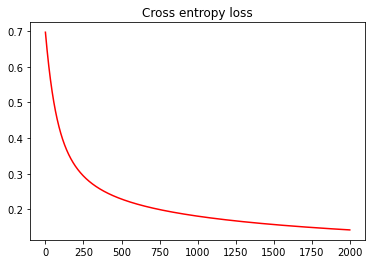

[0.06657955060876565, 0.1348164178789657, -0.5516853484686381, 1.9632477754933817, 1.8235737157148333]


In [336]:
#вариант №1 - градиентный спуск
w_opt, loss_mean_array = graddescent(lr, w, n_epochs, X, Y)

plt.plot(range(0, n_epochs), loss_mean_array, 'r-')
plt.title('Ошибка')
plt.show()

print(w_opt)